# Part A: Basic text mining

#### A1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords?

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = set (stopwords.words('english'))

from string import punctuation

from nltk.tokenize import word_tokenize, sent_tokenize

from pandas import Series, DataFrame
import pandas as pd

[nltk_data] Downloading package punkt to C:\Users\Amy
[nltk_data]     Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Amy Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Amy
[nltk_data]     Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("Train_rev1.csv")
data.head()

fulldescription = data['FullDescription']
fulldescription.head()

0    Engineering Systems Analyst Dorking Surrey Sal...
1    Stress Engineer Glasgow Salary **** to **** We...
2    Mathematical Modeller / Simulation Analyst / O...
3    Engineering Systems Analyst / Mathematical Mod...
4    Pioneer, Miser  Engineering Systems Analyst Do...
Name: FullDescription, dtype: object

In [4]:
#randomly select 2500 descriptions 
import random
df = fulldescription.sample(2500, random_state=99) #without replacement is default

# word tokenize descriptions, POS tagging
tk = []
tk_fil = []
for sen in df:
    #make sentence all lower case 
    sen = sen.lower() 
    #remove punctuation 
    for p in punctuation:
        sen = sen.replace(p,'')
    #tokenize to words
    txt = word_tokenize(sen) 
    #pos tagging
    tk += nltk.pos_tag(txt) 
    #remove stopwords
    txt_fil = [word for word in txt if word not in stop_words]
    #pos tagging (without stopwords)
    tk_fil += nltk.pos_tag(txt_fil)

In [5]:
#list, so can't do .value_counts()

from collections import Counter 

tk_lst = Counter(tag for (word,tag) in tk)
print (tk_lst.most_common(5))

[('NN', 156622), ('JJ', 69815), ('IN', 65416), ('NNS', 50719), ('DT', 50570)]


In [6]:
tk_lst_fil = Counter(tag for (word,tag) in tk_fil) 
print (tk_lst_fil.most_common(5))

[('NN', 151920), ('JJ', 71968), ('NNS', 50232), ('VBG', 25532), ('VBP', 16798)]


#### A2. Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.

In [10]:
for sen in df:
    #make sentence all lower case 
    sen = sen.lower() 
    #remove punctuation 
    for p in punctuation:
        sen = sen.replace(p,'')
    #tokenize to words
    txt = word_tokenize(sen) 
    tk += txt 
    
all_words = nltk.FreqDist(tk)

In [11]:
# plot top 100 words and their rank
topwords = all_words.most_common(100)
frequency = []
for (word, freq) in topwords:
    frequency.append(freq)

frequency = pd.Series(frequency)

In [12]:
# get the observational rank
word_ranking = frequency.rank(method = 'min',ascending =False)

Text(0,0.5,'Word Frequency')

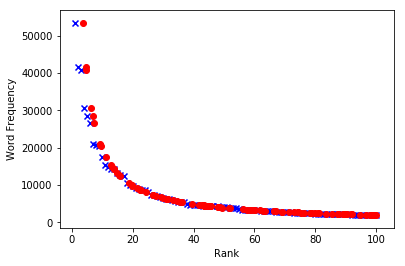

In [13]:
import math 
import numpy as np
from matplotlib import pyplot as plt

# plot observational and theoretical rank 
def theoretical_rank(freq):
    # We will take the frequency of the words to calculate the theoritical rank using variation of Zipf's Law
    rank = math.exp((-1)*(np.log(freq) - np.log(max(word_ranking)*min(frequency))))
    return rank

# get the theoreticacl ranks for the frequencies observed 
theoretical_rank = frequency.map(theoretical_rank)
plt.scatter(word_ranking,frequency,color = 'blue', marker = 'x',label = 'Frequency vs observed rank')
plt.scatter(theoretical_rank,frequency,color = 'red',marker = 'o',label = 'Frequency vs theoritical rank')
plt.xlabel('Rank')
plt.ylabel('Word Frequency')

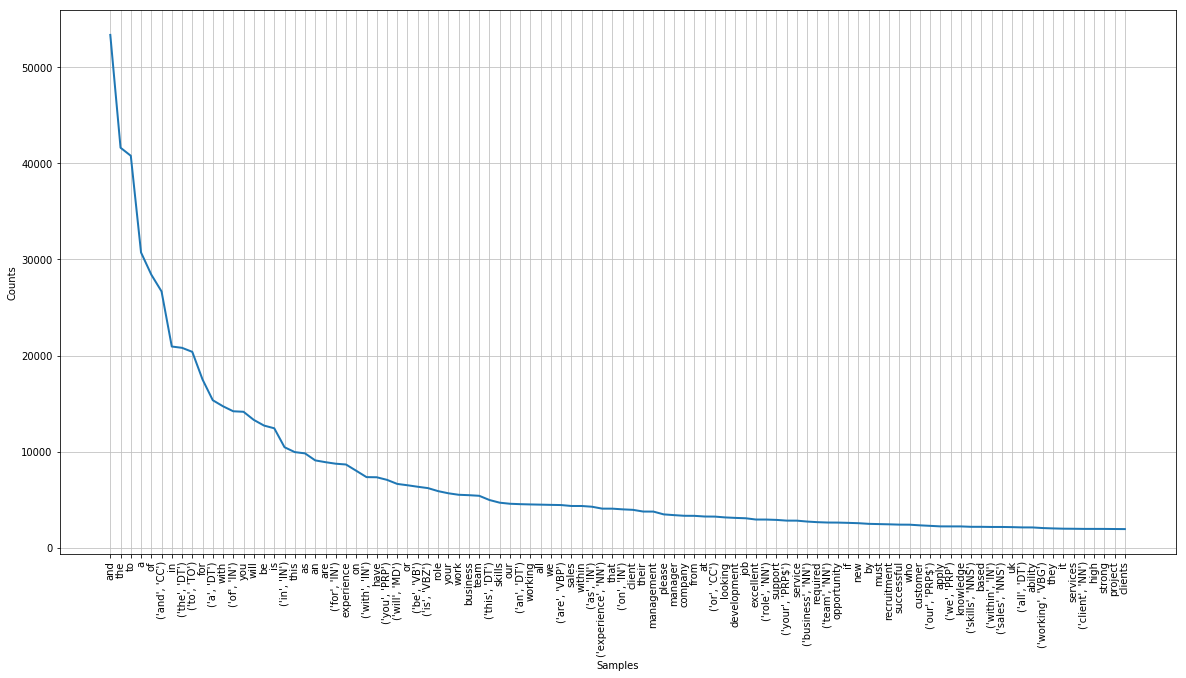

In [14]:
# calculate frequency
# all_words

# plot the top 100 against zipf's law
plt.figure(figsize=(20,10))
all_words.plot(100, cumulative=False)

In [16]:
import operator 
# sorted by frequency 
sort_all_words = pd.DataFrame(sorted(all_words.items(), key=operator.itemgetter(1),reverse=True))

most_common_100 = sort_all_words[:100]
most_common_100.columns = ['word','frequency']
most_common_100['rank'] = most_common_100['frequency'].rank(method='min',ascending=False)
most_common_100['zipf_law'] = [most_common_100["frequency"].max()/r for r in most_common_100['rank']]
most_common_100[:10]

C:\Users\Amy Dang\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Amy Dang\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,word,frequency,rank,zipf_law
0,and,53350,1.0,53350.000000
1,the,41618,2.0,26675.000000
2,to,40782,3.0,17783.333333
3,a,30722,4.0,13337.500000
4,of,28422,5.0,10670.000000
5,"(and, CC)",26675,6.0,8891.666667
6,in,20946,7.0,7621.428571
7,"(the, DT)",20809,8.0,6668.750000
8,"(to, TO)",20391,9.0,5927.777778
9,for,17518,10.0,5335.000000


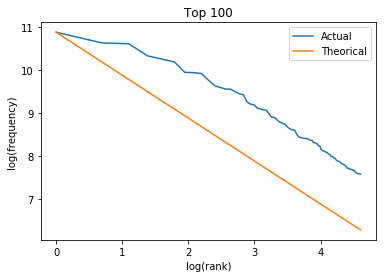

In [18]:
fig = plt.figure()

x = [math.log(c) for c in most_common_100['rank'].values]
y1 = [math.log(c) for c in most_common_100['frequency']]
y2 = [math.log(c) for c in most_common_100['zipf_law']]

ax1 = plt.plot(x,y1,label='Actual')
ax2 = plt.plot(x,y2,label='Theorical')

plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title('Top 100')
plt.legend()
plt.show()

#### A3. If we remove stopwords and lemmatize the data, what are the 10 most common words? What are their frequencies?

In [38]:
for sen in df:
    #make sentence all lower case 
    sen = sen.lower() 
    #remove punctuation 
    for p in punctuation:
        sen = sen.replace(p,'')
    #tokenize to words
    txt = word_tokenize(sen) 
    #pos tagging
    tk += nltk.pos_tag(txt) 
    #remove stopwords
    txt_fil += [word for word in txt if word not in stop_words]

In [39]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(3)
    return most_common_pos_list[0][0]

wordnet_lemmatizer = WordNetLemmatizer()
word_lematized = [wordnet_lemmatizer.lemmatize(w,pos=get_pos(w)) for w in txt_fil] 

word_lematized_words = Counter(word_lematized)
most_common_words = word_lematized_words.most_common()
most_common_words[:10]

[(u'work', 5284),
 (u'experience', 5117),
 ('role', 3162),
 ('team', 3057),
 ('client', 2961),
 ('business', 2862),
 ('service', 2444),
 (u'skill', 2421),
 (u'sale', 2211),
 ('within', 2183)]

# Part B: Predict salary from job description

Test the predictive power of text and compare it with that of numeric data. 

In this section, you will create classification models to predict high (75th percentile and above) or low (below 75th percentile) salary from the text contained in the job descriptions.

#### B1. Ignore the job descriptions, and train a model to predict high/low salary from all the numeric columns, e.g., part time/full time, contract vs. others, type of job (a lot of dummy variables), location (instead of using a huge number of dummy variables, you can use a list of cities in England with highest cost of living, and create a 0/1 variable which is 1 if the job is in one of those cities, else 0). Use the Naïve Bayes classifier. What is the accuracy of your model?

In [40]:
data.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
job_categories         int64
cost_of_living         int64
dtype: object

In [41]:
# Checking for Null values
data.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
job_categories             0
cost_of_living             0
dtype: int64

In [42]:
# create a column for high/low salaries
# we will consider the top 25th percentile (>75th quantile) salaries as HIGH 
# and remaining as low salaries

import warnings
warnings.filterwarnings('ignore')
data['job_categories'] = 0
data['job_categories'][data['SalaryNormalized']> data['SalaryNormalized'].quantile(0.75)] = 1

In [43]:
# convert the locations with high living costs to 1 and other locations as 0

highlivingcost = ['oxford','uk','the city','greater london','central london','london','south east london',\
                  'winchester', 'cambridge', 'chichester', 'brighon and hove', 'bath', 'southhampton',\
                  'salisbury','canterbury','st albans', 'bristol','lichfield','truro','norwich','chelmsford',\
                  'exeter','york','leicester','gloucester']

def living_cost(s):
    if s.lower() in highlivingcost:
        return 1
    else:
        return 0

data['cost_of_living'] = data['LocationNormalized'].apply(living_cost)

In [45]:
# Let us remove the columns which we do not need from the data frame.
job_data_for_prediction = data[['ContractType','ContractTime','Category','job_categories','cost_of_living']]

In [46]:
job_data_dummies = pd.get_dummies(job_data_for_prediction)
column_names = job_data_dummies.loc[:, job_data_dummies.columns != 'job_categories'].columns.values

In [47]:
formula = 'job_categories ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in column_names]))

In [48]:
from patsy import dmatrices
Y, X = dmatrices(formula, job_data_dummies, return_type='dataframe')
y = Y['job_categories'].values

**Split data into train and test** 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

**Baseline Accuracy**

In [50]:
(len(y_test) - y_test.sum()) / len(y_test)

0.7628113467064319

**Multinomial Naive Bayes**

In [54]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
# Fit the model
result = model.fit(X_train, y_train)
# Predict the model on test data
from sklearn import metrics
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

**Bernoulli Naive Bayes**

In [52]:
model = naive_bayes.BernoulliNB()
# Fit the model
result = model.fit(X_train, y_train)
# Predict the model on test data
from sklearn import metrics
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

Now build a classification model with text (full job description) as the only predictor. There are two versions of Naïve Bayes – binomial and multinomial; for the moment, let’s not bother about the theoretical underpinnings! You can use either one for this assignment. For all models, show the confusion matrix.

In [53]:
# Extracting top 1000 most common words (features)
word_features =[]
for (word,freq) in most_common_words:
    word_features.append(word)
word_top_features = word_features[:3000]

#### B2. Create a classification model with all words and the bag-of-words approach. How accurate is the model (show the confusion matrix)? 

Also show the top 10 words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low salary. 

#### B3. Train a “hybrid” model to predict high/low salary using both numeric and text data. Show the accuracy of the model. 

Which model – numeric only, text only and hybrid – provided the highest accuracy in predicting high/low salary? Did the result surprise you? Why or why not?
